In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Setup Complete! 🚀")

Setup Complete! 🚀


In [5]:
# Import libraries
import pandas as pd
import numpy as np

# Load ratings data
ratings_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('../data/raw/ml-100k/u.data', sep='\t', names=ratings_cols)

# Load movies data
movies_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL',
               'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
               'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
               'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('../data/raw/ml-100k/u.item', sep='|', names=movies_cols, encoding='latin-1')

# Load users data
users_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv('../data/raw/ml-100k/u.user', sep='|', names=users_cols)

# Display first few rows
ratings.head(), movies.head(), users.head()


(   user_id  movie_id  rating  timestamp
 0      196       242       3  881250949
 1      186       302       3  891717742
 2       22       377       1  878887116
 3      244        51       2  880606923
 4      166       346       1  886397596,
    movie_id              title release_date  video_release_date  \
 0         1   Toy Story (1995)  01-Jan-1995                 NaN   
 1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
 2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
 3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
 4         5     Copycat (1995)  01-Jan-1995                 NaN   
 
                                             IMDb_URL  unknown  Action  \
 0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
 1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
 2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
 3  http://us.imdb.com/M/title-exact?Get%20Shor

In [12]:
# Check data info
print("Ratings Info:")
ratings.info()

print("\nMovies Info:")
movies.info()

print("\nUsers Info:")
users.info()

# Check for missing values
print("\nMissing Values:")
print("Ratings:", ratings.isnull().sum().sum())
print("Movies:", movies.isnull().sum().sum())
print("Users:", users.isnull().sum().sum())


Ratings Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB

Movies Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   title               1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDb_URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   in

In [10]:
# Drop columns not required for our analysis
movies_cleaned = movies.drop(['video_release_date', 'IMDb_URL'], axis=1)


In [13]:
# Check missing values explicitly for release_date
movies_cleaned['release_date'].isnull().sum()


np.int64(0)

In [14]:
# Convert UNIX timestamp to readable datetime
ratings['rating_date'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings.drop('timestamp', axis=1, inplace=True)
ratings.head()


,user_id,movie_id,rating,rating_date
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


In [15]:
# Merge ratings and movies data
ratings_movies = ratings.merge(movies_cleaned, on='movie_id', how='left')

# Merge with users data
final_df = ratings_movies.merge(users, on='user_id', how='left')

# Check final merged dataframe
final_df.head()


,user_id,movie_id,rating,rating_date,title,release_date,unknown,Action,Adventure,Animation,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip_code
0,196,242,3,1997-12-04 15:55:49,Kolya (1996),24-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,49,M,writer,55105
1,186,302,3,1998-04-04 19:22:22,L.A. Confidential (1997),01-Jan-1997,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,39,F,executive,00000
2,22,377,1,1997-11-07 07:18:36,Heavyweights (1994),01-Jan-1994,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,25,M,writer,40206
3,244,51,2,1997-11-27 05:02:03,Legends of the Fall (1994),01-Jan-1994,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,28,M,technician,80525
4,166,346,1,1998-02-02 05:33:16,Jackie Brown (1997),01-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,47,M,educator,55113


In [16]:
# Verify dataframe shape and columns
print("Final DataFrame Shape:", final_df.shape)
print("Columns:", final_df.columns)


Final DataFrame Shape: (100000, 29)
Columns: Index(['user_id', 'movie_id', 'rating', 'rating_date', 'title', 'release_date',
       'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'age', 'gender', 'occupation', 'zip_code'],
      dtype='object')


In [17]:
# Save to CSV in processed directory
final_df.to_csv('../data/processed/movie_ratings_processed.csv', index=False)


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  # Better visuals


In [19]:
df = pd.read_csv('../data/processed/movie_ratings_processed.csv')

# Verify load
df.head()


,user_id,movie_id,rating,rating_date,title,release_date,unknown,Action,Adventure,Animation,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip_code
0,196,242,3,1997-12-04 15:55:49,Kolya (1996),24-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,49,M,writer,55105
1,186,302,3,1998-04-04 19:22:22,L.A. Confidential (1997),01-Jan-1997,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,39,F,executive,00000
2,22,377,1,1997-11-07 07:18:36,Heavyweights (1994),01-Jan-1994,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,25,M,writer,40206
3,244,51,2,1997-11-27 05:02:03,Legends of the Fall (1994),01-Jan-1994,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,28,M,technician,80525
4,166,346,1,1998-02-02 05:33:16,Jackie Brown (1997),01-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,47,M,educator,55113


In [20]:
# Check the shape (rows, columns)
print(df.shape)

# Check column names
print(df.columns)

# Check data types & null values
df.info()


(100000, 29)
Index(['user_id', 'movie_id', 'rating', 'rating_date', 'title', 'release_date',
       'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'age', 'gender', 'occupation', 'zip_code'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       100000 non-null  int64  
 1   movie_id      100000 non-null  int64  
 2   rating        100000 non-null  int64  
 3   rating_date   100000 non-null  object 
 4   title         99991 non-null   object 
 5   release_date  99991 non-null   object 
 6   unknown       99991 non-null   float64
 7   Action        99991 non-null   float64
 8   Adventure     99991 non-null   float64
 9   Anima

In [21]:
df = pd.read_csv('../data/processed/movie_ratings_processed.csv')

In [22]:
df[df['title'].isnull() | df['release_date'].isnull()]

,user_id,movie_id,rating,rating_date,title,release_date,unknown,Action,Adventure,Animation,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip_code
2172,130,267,5,1997-10-02 14:07:19,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20,M,none,60115
3781,5,267,4,1997-09-30 15:57:44,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,33,F,other,15213
7245,268,267,3,1997-10-01 21:41:17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,24,M,engineer,19422
12475,297,267,3,1997-09-28 01:12:19,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29,F,educator,98103
14756,319,267,4,1997-10-01 12:08:10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,38,M,programmer,22030
15292,1,267,4,1997-10-01 08:02:35,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,24,M,technician,85711
49295,532,267,3,1997-09-28 10:09:08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20,M,student,92705
93523,833,267,1,1997-09-30 21:41:09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,34,M,writer,90019
99723,422,267,4,1997-09-30 21:46:26,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,26,M,entertainment,94533


In [23]:
df_cleaned = df.dropna(subset=['title', 'release_date'])

In [24]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99991 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       99991 non-null  int64  
 1   movie_id      99991 non-null  int64  
 2   rating        99991 non-null  int64  
 3   rating_date   99991 non-null  object 
 4   title         99991 non-null  object 
 5   release_date  99991 non-null  object 
 6   unknown       99991 non-null  float64
 7   Action        99991 non-null  float64
 8   Adventure     99991 non-null  float64
 9   Animation     99991 non-null  float64
 10  Children      99991 non-null  float64
 11  Comedy        99991 non-null  float64
 12  Crime         99991 non-null  float64
 13  Documentary   99991 non-null  float64
 14  Drama         99991 non-null  float64
 15  Fantasy       99991 non-null  float64
 16  Film-Noir     99991 non-null  float64
 17  Horror        99991 non-null  float64
 18  Musical       99991 non-null  f

In [25]:
df_cleaned.to_csv('../data/processed/movie_ratings_processed.csv', index=False)

In [26]:
df_final = pd.read_csv('../data/processed/movie_ratings_processed.csv')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99991 entries, 0 to 99990
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       99991 non-null  int64  
 1   movie_id      99991 non-null  int64  
 2   rating        99991 non-null  int64  
 3   rating_date   99991 non-null  object 
 4   title         99991 non-null  object 
 5   release_date  99991 non-null  object 
 6   unknown       99991 non-null  float64
 7   Action        99991 non-null  float64
 8   Adventure     99991 non-null  float64
 9   Animation     99991 non-null  float64
 10  Children      99991 non-null  float64
 11  Comedy        99991 non-null  float64
 12  Crime         99991 non-null  float64
 13  Documentary   99991 non-null  float64
 14  Drama         99991 non-null  float64
 15  Fantasy       99991 non-null  float64
 16  Film-Noir     99991 non-null  float64
 17  Horror        99991 non-null  float64
 18  Musical       99991 non-nu

/var/folders/z9/k5mpzs5n7yvdr65g96bpt72m0000gn/T/ipykernel_4200/1486961685.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


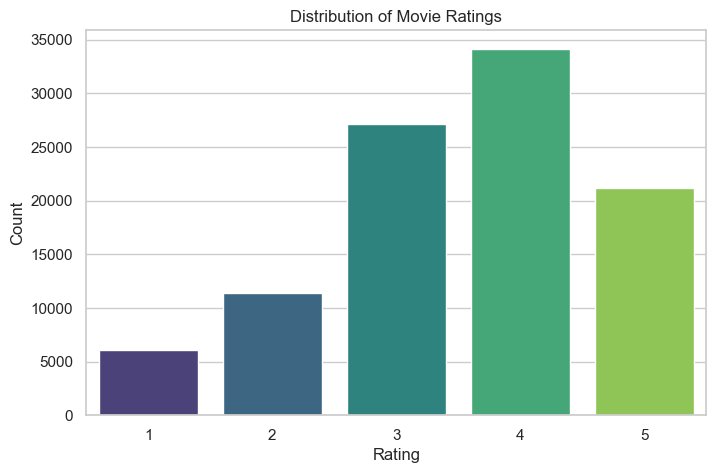

In [ ]:
#Rating Distibutions
plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

/var/folders/z9/k5mpzs5n7yvdr65g96bpt72m0000gn/T/ipykernel_4200/1898361506.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_rated.index, x=top_rated.values, palette='mako')


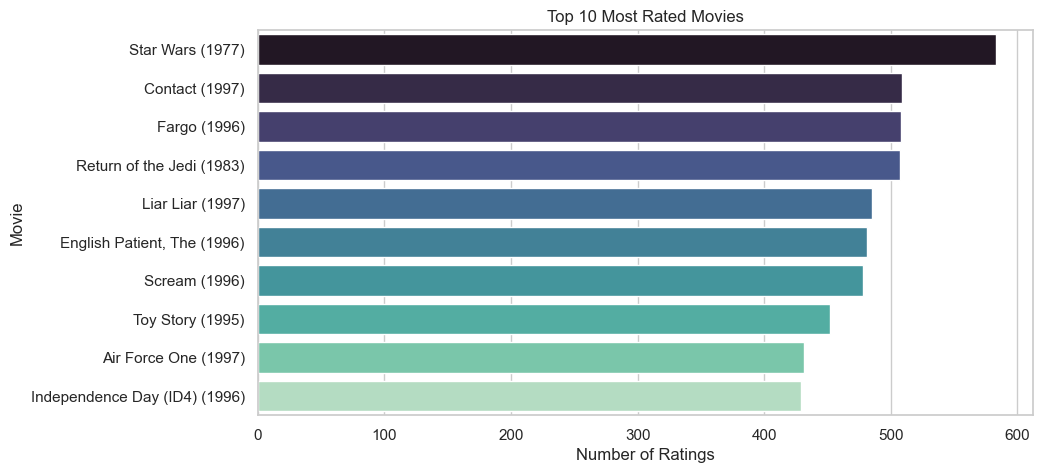

In [ ]:
#Top 10 Rated movies
top_rated = df['title'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(y=top_rated.index, x=top_rated.values, palette='mako')
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie")
plt.show()

/var/folders/z9/k5mpzs5n7yvdr65g96bpt72m0000gn/T/ipykernel_4200/802469427.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_avg_ratings.index, x=top_avg_ratings['mean'], palette='rocket')


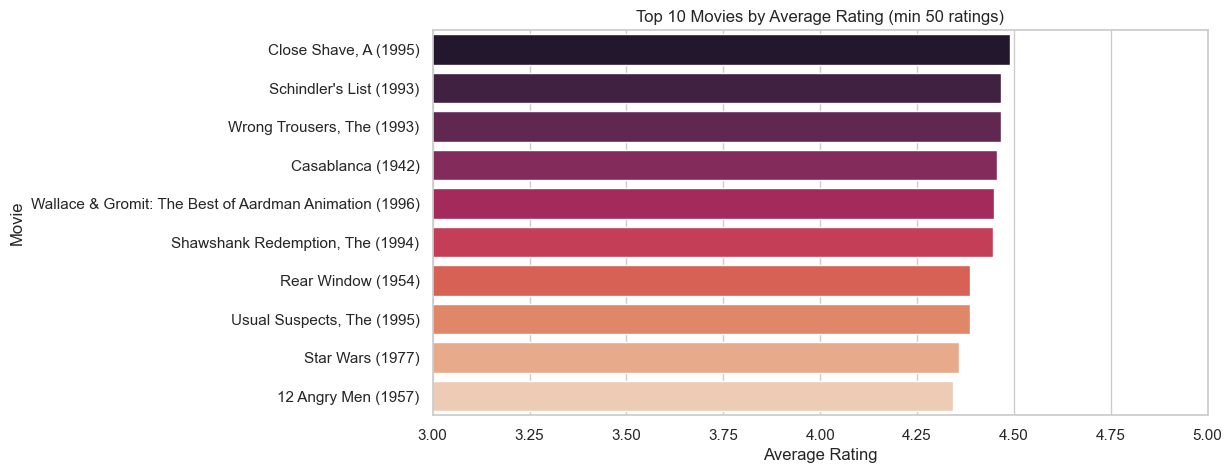

In [ ]:
#Popular movies at least 50 ratings
avg_ratings = df.groupby('title')['rating'].agg(['mean', 'count'])
top_avg_ratings = avg_ratings[avg_ratings['count'] >= 50].sort_values('mean', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(y=top_avg_ratings.index, x=top_avg_ratings['mean'], palette='rocket')
plt.title("Top 10 Movies by Average Rating (min 50 ratings)")
plt.xlabel("Average Rating")
plt.ylabel("Movie")
plt.xlim(3,5)
plt.show()

/var/folders/z9/k5mpzs5n7yvdr65g96bpt72m0000gn/T/ipykernel_4200/2534844134.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='crest')


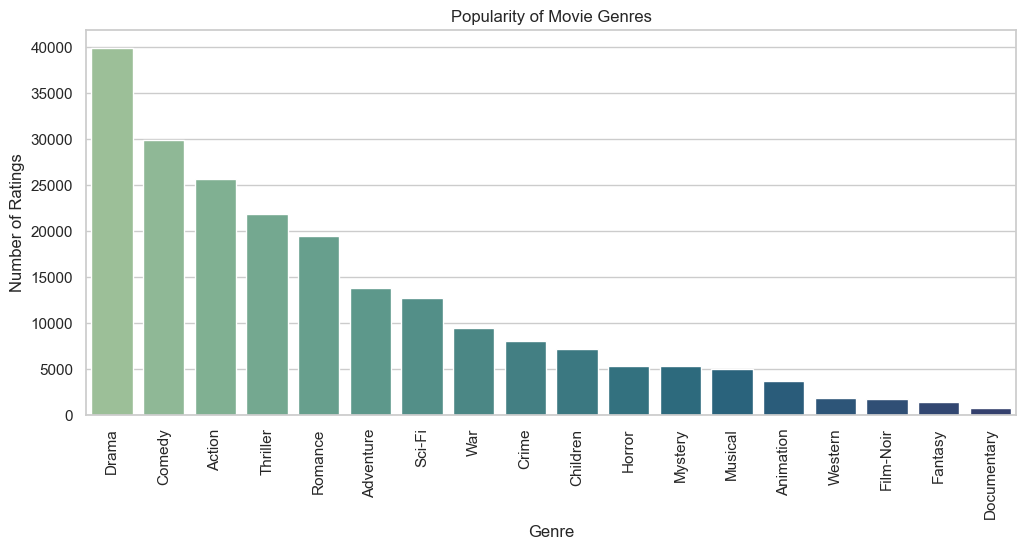

In [ ]:
#Popular movies by Genress
genre_cols = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
              'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
              'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

genre_counts = df[genre_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='crest')
plt.title("Popularity of Movie Genres")
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Number of Ratings")
plt.show()

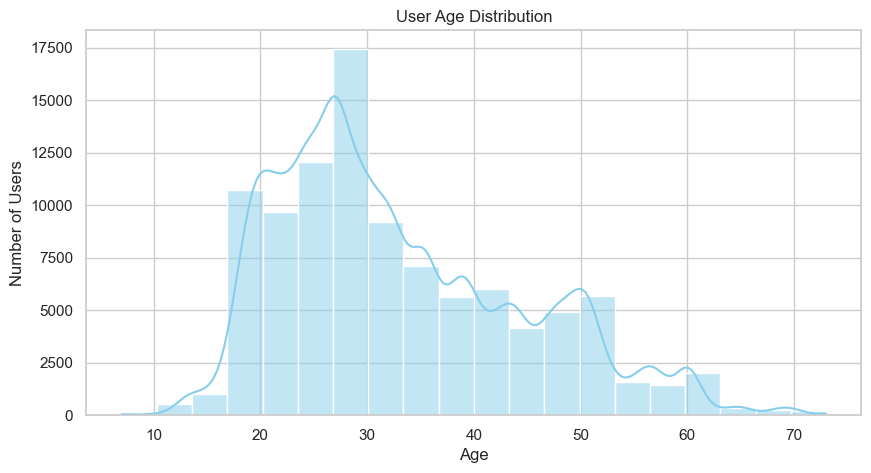

In [ ]:
#Age Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['age'].dropna(), bins=20, kde=True, color='skyblue')
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.show()

/var/folders/z9/k5mpzs5n7yvdr65g96bpt72m0000gn/T/ipykernel_4200/1974490562.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='pastel')


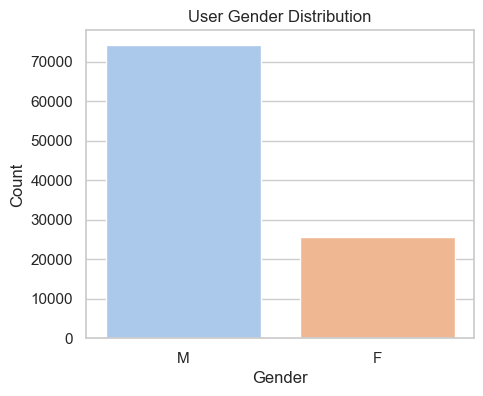

In [ ]:
#Gender Distribution
plt.figure(figsize=(5,4))
sns.countplot(x='gender', data=df, palette='pastel')
plt.title("User Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

/var/folders/z9/k5mpzs5n7yvdr65g96bpt72m0000gn/T/ipykernel_4200/1994660112.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_occ.index, x=top_occ.values, palette='cubehelix')


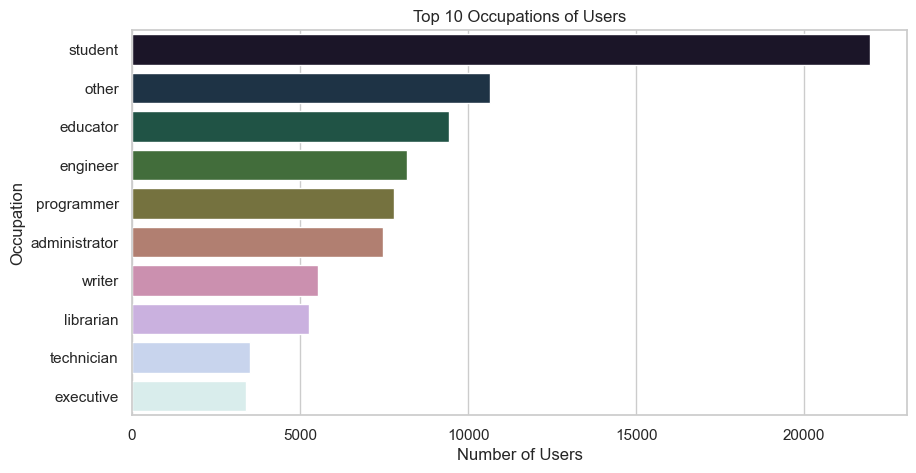

In [34]:
#Top 10 Occupation and user count
top_occ = df['occupation'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(y=top_occ.index, x=top_occ.values, palette='cubehelix')
plt.title("Top 10 Occupations of Users")
plt.xlabel("Number of Users")
plt.ylabel("Occupation")
plt.show()


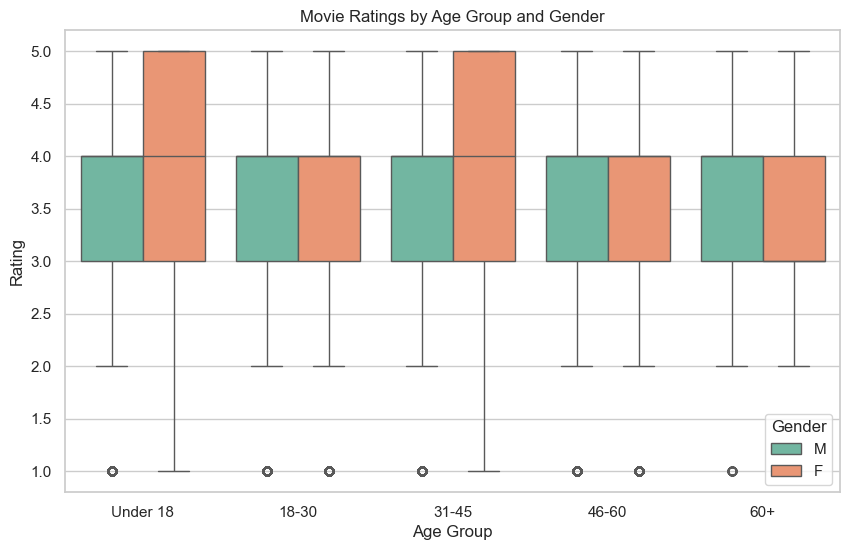

In [35]:
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 100],
                         labels=['Under 18', '18-30', '31-45', '46-60', '60+'])

plt.figure(figsize=(10,6))
sns.boxplot(x='age_group', y='rating', hue='gender', data=df, palette='Set2')
plt.title("Movie Ratings by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Rating")
plt.legend(title='Gender')
plt.show()

### Insights:
- Most common ratings are 3 and 4.
- Drama and Comedy are most popular genres.
- Majority of users are in the 18–30 age group.


In [36]:
pip install psycopg2 pandas tqdm

  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'psycopg2' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'psycopg2'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for psycopg2: filename=psycopg2-2.9.10-cp311-cp311-macosx_11_0_arm64.whl size=132323 sha256=e2cd4ab24ec17458820f4c1f1373f2197dbf77a2b7e0dc519470ec7cbf349af2
  Stored in directory: /Users/ajinkyaambadkar/Library/Caches/pip/wheels/d9/83/60/e9660320860aef3c38a67dea6ff9538e4cad76502cb39ed280
Successfully built psycopg2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [psycopg2]
Note: you may need to restart the kernel to use updated packages.
